In [2]:
import numpy as np
import pandas as pd
import datetime
import nltk; nltk.download('popular')
from collections import defaultdict
import matplotlib.pyplot as plt
plt.close('all')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [22]:
dem_df = pd.read_csv("../Democrats/data/dem_data/dem_status_data_former.csv")
rep_df = pd.read_csv("../Republicans/data/rep_data/rep_status_data_former.csv")

In [23]:
dem_df

,user_name,status,datetime
0,Sen. Maggie Hassan,On the anniversary of the Pulse shooting we sh...,2020-06-12 18:18:08.419898
1,Jeanne Shaheen,The Portsmouth Naval Shipyard was founded 220 ...,2020-06-12 18:21:53.899517
2,Ed Markey,Trans rights are human rights and Donald Trump...,2020-06-12 18:52:04.348422
3,Tammy Duckworth,"For over a century, when our nation has asked ...",2020-06-12 18:54:17.823207
4,Kyrsten Sinema,Arizonans: @AZStateBar offers a hotline for le...,2020-06-12 19:00:06.251557
...,...,...,...
1208,Senator Jon Tester,#PrideMonth is a time to celebrate the immense...,2020-06-22 14:41:20.066319
1209,Senator Dick Durbin,With Pres. Trump still threatening to end #DAC...,2020-06-22 14:48:04.706028
1210,Senator Bob Casey,Last week’s #SCOTUS ruling rejecting President...,2020-06-22 14:48:36.696094
1211,Elizabeth Warren,"After Hurricane Maria devastated Puerto Rico, ...",2020-06-22 15:02:46.738707


In [24]:
rep_df

,user_name,status,datetime
0,Ted Cruz,Pelosi calls for removing racist Democrats fro...,2020-06-12 18:15:28.971144
1,Marco Rubio,Today we sent a bipartisan list of questions t...,2020-06-12 18:37:02.087157
2,Sen. Marsha Blackburn,Chinese sweatshops and Communist blood money a...,2020-06-12 18:37:17.812156
3,Marco Rubio,Just FYI this headline is 100% false &amp; art...,2020-06-12 19:05:33.737982
4,Cindy Hyde-Smith,Today we honor the millions of women who have ...,2020-06-12 19:15:05.426970
...,...,...,...
957,ChuckGrassley,Q&amp;A w Council Bluffs Area Chamber of Comme...,2020-06-22 14:54:19.441036
958,Joni Ernst,Congrats to the 19th Chief Master Sergeant of ...,2020-06-22 14:54:32.174205
959,Thom Tillis,"Thanks to our Small Business Advisory Council,...",2020-06-22 15:01:04.687951
960,Cory Gardner,More than 70% of land in Mesa County is owned ...,2020-06-22 15:02:48.873367


In [25]:
rep_date_list = []
for i in range(len(rep_df['datetime'])):
    if datetime.datetime.strptime(rep_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").day == 18:
        rep_date_list.append(datetime.datetime.strptime(rep_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").hour)

print(rep_date_list)

[0, 5, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 22, 23]


In [26]:
dem_date_list = []
for j in range(len(dem_df['datetime'])):
    if datetime.datetime.strptime(dem_df['datetime'].iloc[j], "%Y-%m-%d %H:%M:%S.%f").day == 18: 
        dem_date_list.append(datetime.datetime.strptime(dem_df['datetime'].iloc[j], "%Y-%m-%d %H:%M:%S.%f").hour)

print(dem_date_list)

[0, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21]


In [27]:
current_date = datetime.datetime.now().strftime('%m-%d-%y')

print(min(rep_date_list[0], dem_date_list[0]))
print(max(rep_date_list[-1], dem_date_list[-1]))

date_range = pd.date_range(start=min(rep_date_list[0], dem_date_list[0]), end=max(rep_date_list[-1], dem_date_list[-1]), freq='1H').day

print(date_range)

0
23
Int64Index([1], dtype='int64')


In [28]:
# Find out how many tweets were tweeted on each day
# For the Republicans
temp = set(rep_date_list)
rep_freq_list = []

for x in temp:
    rep_freq_list.append(rep_date_list.count(x))
    
temp = list(temp)
print(rep_freq_list)

[1, 1, 2, 3, 6, 13, 15, 7, 16, 9, 10, 18, 11, 14, 8, 6, 1, 1, 1]


In [29]:
# Find out how many tweets were tweeted on each day
# For the Democrats
temp = set(dem_date_list)
dem_freq_list = []

for x in temp:
    dem_freq_list.append(dem_date_list.count(x))
    
temp = list(temp)

print(dem_freq_list)

[1, 3, 20, 29, 20, 16, 22, 14, 12, 11, 18, 13, 10, 6, 4]


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

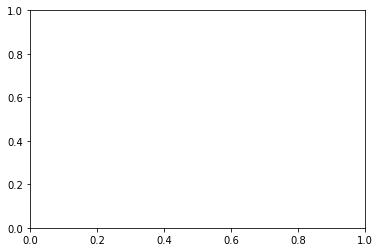

In [30]:
dem_date_list = np.array(dem_date_list)
rep_date_list = np.array(rep_date_list)

plt.plot(date_range, rep_freq_list[:5], label="Republican", color='r')
plt.plot(date_range, dem_freq_list[:5], label="Democrat", color='b')
plt.legend(loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Number of Tweets")
plt.show()

In [31]:
# parse user names out of the dataframe

dem_name_list = []
rep_name_list = []

for name in dem_df['user_name']:
    dem_name_list.append(str(name))
    
for name in rep_df['user_name']:
    rep_name_list.append(str(name))


In [32]:
dem_names = set(dem_df['user_name'])
rep_names = set(rep_df['user_name'])


all_name_count = {}

for name in dem_names:
    all_name_count[name] = dem_name_list.count(name)
    
for name in rep_names:
    all_name_count[name] = rep_name_list.count(name)


all_name_count = sorted(all_name_count.items(), key=lambda x: x[1], reverse=True)


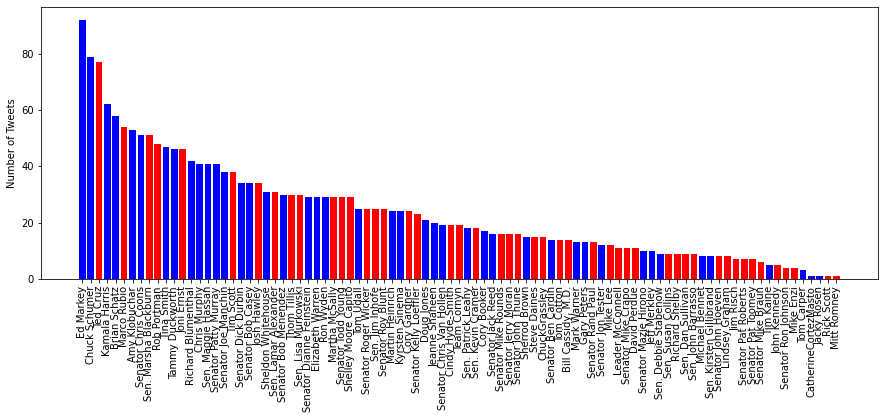

In [33]:
fig = plt.figure(figsize=(15,5))

for x in all_name_count:
    if x[0] in dem_name_list:
        plt.bar(x[0], x[1], color=('b'))
    elif x[0] in rep_name_list:
        plt.bar(x[0], x[1], color=('r'))


plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Number of Tweets")
plt.show()

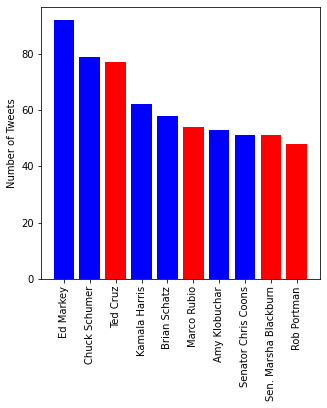

In [34]:
fig = plt.figure(figsize=(5,5))

for x in all_name_count[:10]:
    if x[0] in dem_name_list:
        plt.bar(x[0], x[1], color=('b'))
    elif x[0] in rep_name_list:
        plt.bar(x[0], x[1], color=('r'))


plt.xticks(rotation='vertical')
plt.ylabel("Number of Tweets")
plt.show()

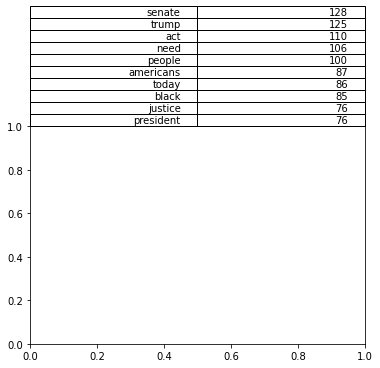

In [35]:
# Get statuses from dataframe in string form.

status_list = []
status_dict = {}

for status in dem_df['status']:
    for word in status.split():
        token = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(token)
        if tagged[0][1][0] == 'N':
            status_list.append(word.lower())
     
        
set_status_list = set(status_list)

for word in set_status_list:
    status_dict[word] = status_list.count(word)
    
status_dict = sorted(status_dict.items(), key=lambda x: x[1], reverse=True)
table_list = []

for tup in status_dict[:10]:
    tup = list(tup)
    tup[1] = str(tup[1])
    table_list.append(tup)
    
plt.table(table_list, loc='top')
plt.show()


In [36]:
status_list = []
status_dict = {}

for status in rep_df['status']:
    for word in status.split():
        token = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(token)
        if tagged[0][1][0] == 'N':
            status_list.append(word.lower())
     
        
set_status_list = set(status_list)

for word in set_status_list:
    status_dict[word] = status_list.count(word)
    
status_dict = sorted(status_dict.items(), key=lambda x: x[1], reverse=True)

for tup in status_dict[:10]:
    print(tup)



('senate', 82)
('help', 81)
('act', 67)
('police', 65)
('work', 63)
('today', 58)
('support', 57)
('legislation', 53)
('great', 50)
('day', 47)
